In [1]:
import pandas as pd 
import numpy as np

In [19]:
import os
#!pip install cv2
import cv2  
import numpy as np

# Define the paths to your closed eyes and open eyes image directories
closed_eyes_dir = "C:/Users/Mukesh/Desktop/jupyter lab/Batch 40/Dwasinees/Detecting drawss/train/Closed_Eyes"
open_eyes_dir = "C:/Users/Mukesh/Desktop/jupyter lab/Batch 40/Dwasinees/Detecting drawss/train/Open_Eyes"

In [20]:
# Lists to store image data and labels
images = []
labels = []

In [21]:
# Load images from the closed eyes folder
for filename in os.listdir(closed_eyes_dir):
    if filename.endswith(".png"):
        img = cv2.imread(os.path.join(closed_eyes_dir, filename))
        img = cv2.resize(img, (224, 224))  # Resize the image (adjust dimensions as needed)
        img = img / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
        labels.append(1)  # 1 for closed eyes

In [22]:
# Load images from the open eyes folder
for filename in os.listdir(open_eyes_dir):
    if filename.endswith(".png"):
        img = cv2.imread(os.path.join(open_eyes_dir, filename))
        img = cv2.resize(img, (224, 224))  # Resize the image (adjust dimensions as needed)
        img = img / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
        labels.append(0)  # 0 for open eyes

In [23]:
# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

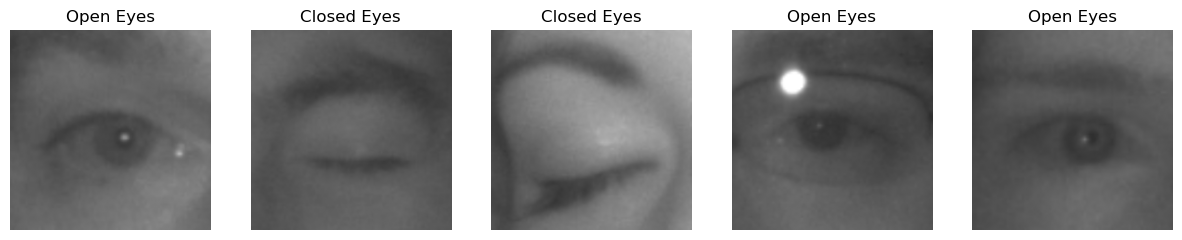

In [24]:
import matplotlib.pyplot as plt
# Define class labels
class_labels = {0: 'Open Eyes', 1: 'Closed Eyes'}

# Choose a random sample of images to visualize
num_samples = 5
random_indices = np.random.choice(len(images), num_samples, replace=False)

# Create subplots for visualization
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for i, idx in enumerate(random_indices):
    ax = axes[i]
    ax.imshow(images[idx])
    ax.set_title(class_labels[labels[idx]])
    ax.axis('off')

plt.show()

# CNN

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, 2)  # 2 classes: open eyes (0) and closed eyes (1)
y_test = to_categorical(y_test, 2)








In [26]:
# Build a simple convolutional neural network (CNN) model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Output layer with 2 neurons for binary classification
])

In [27]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
80/80 [==============================] - 53s 648ms/step - loss: 0.5946 - accuracy: 0.8137 - val_loss: 0.1347 - val_accuracy: 0.9484
Epoch 2/10
80/80 [==============================] - 52s 651ms/step - loss: 0.0944 - accuracy: 0.9684 - val_loss: 0.0514 - val_accuracy: 0.9812
Epoch 3/10
80/80 [==============================] - 49s 618ms/step - loss: 0.0506 - accuracy: 0.9836 - val_loss: 0.0764 - val_accuracy: 0.9797
Epoch 4/10
80/80 [==============================] - 50s 622ms/step - loss: 0.0392 - accuracy: 0.9871 - val_loss: 0.0329 - val_accuracy: 0.9875
Epoch 5/10
80/80 [==============================] - 50s 624ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0270 - val_accuracy: 0.9937
Epoch 6/10
80/80 [==============================] - 51s 632ms/step - loss: 0.0208 - accuracy: 0.9941 - val_loss: 0.0248 - val_accuracy: 0.9906
Epoch 7/10
80/80 [==============================] - 51s 636ms/step - loss: 0.0281 - accuracy: 0.9930 - val_loss: 0.0387 - val_accuracy: 0.9875

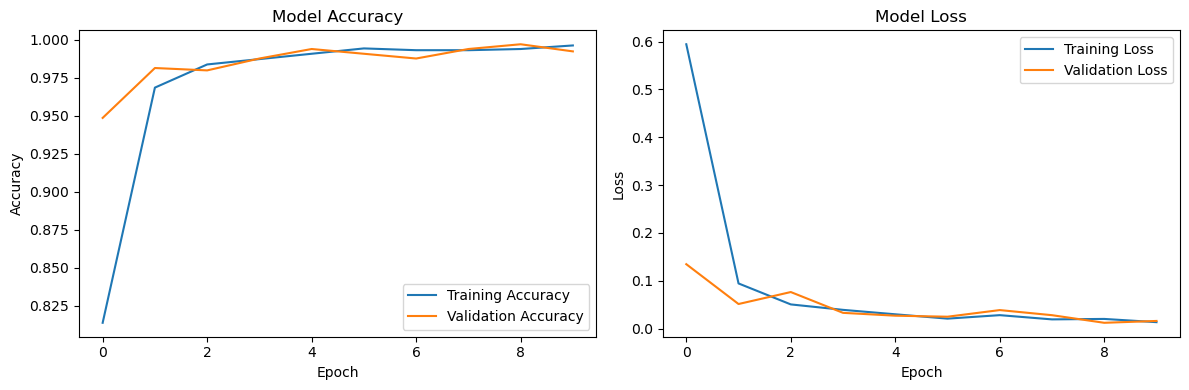

In [28]:
import matplotlib.pyplot as plt

# Extract the training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)  # Replace with your actual training code

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [29]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

25/25 [==============================] - 4s 139ms/step - loss: 0.0081 - accuracy: 0.9975
Test accuracy: 99.75%


In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions back to labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate confusion matrix
confusion = confusion_matrix(y_test_labels, y_pred_labels)

# Calculate classification report
class_report = classification_report(y_test_labels, y_pred_labels, target_names=["Open Eyes", "Closed Eyes"])

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)

# Display results
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy:", accuracy)


25/25 [==============================] - 4s 146ms/step
Confusion Matrix:
[[376   2]
 [  0 422]]

Classification Report:
              precision    recall  f1-score   support

   Open Eyes       1.00      0.99      1.00       378
 Closed Eyes       1.00      1.00      1.00       422

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Accuracy: 0.9975


In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Define the number of folds
num_folds = 5  # You can adjust this number

# Initialize lists to store performance metrics across folds
accuracies = []
confusion_matrices = []

# Define Stratified K-fold cross-validator
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop through each fold
for train_index, test_index in skf.split(images, labels):
    # Split the dataset into training and test sets for this fold
    X_train, X_test = images[train_index], images[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    # Create and compile your CNN model here (as shown in your code)

    # Train the model
    history = model.fit(X_train, to_categorical(y_train, 2), epochs=10, batch_size=32, validation_split=0.2)

    # Evaluate the model on the test set for this fold
    test_loss, test_acc = model.evaluate(X_test, to_categorical(y_test, 2))
    accuracies.append(test_acc)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_test_labels = np.argmax(to_categorical(y_test, 2), axis=1)

    # Calculate confusion matrix
    confusion = confusion_matrix(y_test_labels, y_pred_labels)
    confusion_matrices.append(confusion)

# Calculate and print average accuracy across folds
avg_accuracy = sum(accuracies) / num_folds
print(f"Average Accuracy: {avg_accuracy * 100:.2f}%")

# Calculate and print overall confusion matrix
avg_confusion = sum(confusion_matrices)
print("Overall Confusion Matrix:")
print(avg_confusion)


Epoch 1/10
80/80 [==============================] - 67s 830ms/step - loss: 0.0411 - accuracy: 0.9848 - val_loss: 0.0276 - val_accuracy: 0.9937
Epoch 2/10
80/80 [==============================] - 60s 746ms/step - loss: 0.0216 - accuracy: 0.9922 - val_loss: 0.0289 - val_accuracy: 0.9969
Epoch 3/10
80/80 [==============================] - 53s 663ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.0108 - val_accuracy: 0.9984
Epoch 4/10
80/80 [==============================] - 52s 647ms/step - loss: 0.0164 - accuracy: 0.9953 - val_loss: 0.0714 - val_accuracy: 0.9828
Epoch 5/10
80/80 [==============================] - 106s 1s/step - loss: 0.0123 - accuracy: 0.9945 - val_loss: 0.0766 - val_accuracy: 0.9703
Epoch 6/10
80/80 [==============================] - 52s 644ms/step - loss: 0.0145 - accuracy: 0.9949 - val_loss: 0.0197 - val_accuracy: 0.9937
Epoch 7/10
80/80 [==============================] - 52s 655ms/step - loss: 0.0073 - accuracy: 0.9988 - val_loss: 0.0148 - val_accuracy: 0.9953
E

# Increased Layer In CNN

In [19]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)












In [20]:
# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0

In [21]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

In [23]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


In [24]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
100/100 [==============================] - 106s 1s/step - loss: 0.6490 - accuracy: 0.6403 - val_loss: 0.5102 - val_accuracy: 0.8075
Epoch 2/10
100/100 [==============================] - 98s 981ms/step - loss: 0.3531 - accuracy: 0.8481 - val_loss: 0.2176 - val_accuracy: 0.9350
Epoch 3/10
100/100 [==============================] - 189s 2s/step - loss: 0.1743 - accuracy: 0.9506 - val_loss: 0.1045 - val_accuracy: 0.9712
Epoch 4/10
100/100 [==============================] - 99s 991ms/step - loss: 0.1210 - accuracy: 0.9641 - val_loss: 0.0720 - val_accuracy: 0.9812
Epoch 5/10
100/100 [==============================] - 99s 986ms/step - loss: 0.0907 - accuracy: 0.9756 - val_loss: 0.0623 - val_accuracy: 0.9825
Epoch 6/10
100/100 [==============================] - 98s 985ms/step - loss: 0.0833 - accuracy: 0.9762 - val_loss: 0.0534 - val_accuracy: 0.9825
Epoch 7/10
100/100 [==============================] - 99s 990ms/step - loss: 0.0651 - accuracy: 0.9825 - val_loss: 0.0486 - val_accura

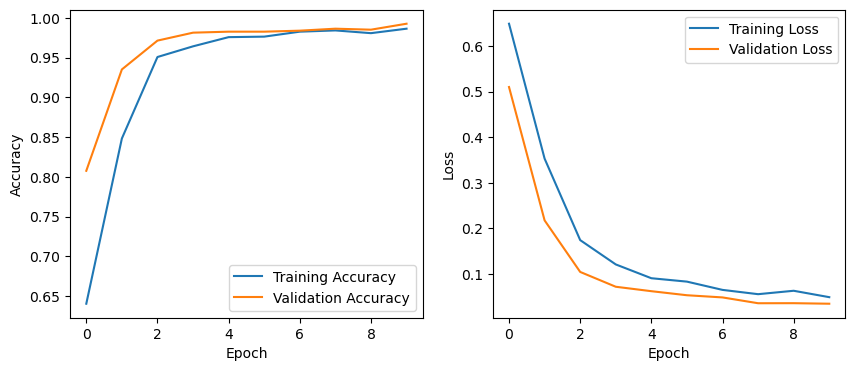

In [25]:
# Train the model with a specified number of epochs
epochs = 10  # You can adjust this value
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))
# Plot the training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

25/25 [==============================] - 6s 221ms/step - loss: 63.9058 - accuracy: 0.7788
Test accuracy: 77.88%


In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions back to labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate confusion matrix
confusion = confusion_matrix(y_test_labels, y_pred_labels)

# Calculate classification report
class_report = classification_report(y_test_labels, y_pred_labels, target_names=["Open Eyes", "Closed Eyes"])

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)

# Display results
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy:", accuracy)

25/25 [==============================] - 6s 221ms/step
Confusion Matrix:
[[201 177]
 [  0 422]]

Classification Report:
              precision    recall  f1-score   support

   Open Eyes       1.00      0.53      0.69       378
 Closed Eyes       0.70      1.00      0.83       422

    accuracy                           0.78       800
   macro avg       0.85      0.77      0.76       800
weighted avg       0.84      0.78      0.76       800


Accuracy: 0.77875


# ResNet

In [8]:
input_shape = (224, 224, 3)  # Adjust dimensions as per your images
num_classes = 2  # 2 classes: Closed Eyes and Open Eyes

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [10]:
# Load and preprocess training data
train_generator = datagen.flow_from_directory(
    "C:/Users/Mukesh/Desktop/jupyter lab/Batch 40/Dwasinees/Detecting drawss/train",
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='binary'  # Assumes two classes: 0 for open eyes, 1 for closed eyes
)

Found 4000 images belonging to 2 classes.


In [11]:
# Load and preprocess validation data (similar to training data)
val_generator = datagen.flow_from_directory(
    "C:/Users/Mukesh/Desktop/jupyter lab/Batch 40/Dwasinees/Detecting drawss/train",
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='binary')  # Assumes two classes: 0 for open eyes, 1 for closed eyes

Found 4000 images belonging to 2 classes.


In [12]:
# Create a ResNet50V2 model with custom head
def create_resnet_model(input_shape, num_classes):
    base_model = keras.applications.ResNet50V2(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )

    for layer in base_model.layers:
        layer.trainable = False

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.models.Model(inputs=base_model.input, outputs=outputs)
    return model

In [13]:
# Create and compile the ResNet model
model = create_resnet_model(input_shape, num_classes)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [14]:
# Define a model checkpoint to save the best model during training
checkpoint = ModelCheckpoint(
    "best_model.h5",
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="max"
)

In [15]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs
    callbacks=[checkpoint], validation_data=val_generator # Save the best mode
)



Epoch 1/10
125/125 [==============================] - ETA: 0s - loss: 0.0528 - accuracy: 0.9787
Epoch 1: val_accuracy improved from -inf to 0.99925, saving model to best_model.h5


C:\Users\Mukesh\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


125/125 [==============================] - 364s 3s/step - loss: 0.0528 - accuracy: 0.9787 - val_loss: 0.0036 - val_accuracy: 0.9992
Epoch 2/10
125/125 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.9980
Epoch 2: val_accuracy did not improve from 0.99925
125/125 [==============================] - 430s 3s/step - loss: 0.0079 - accuracy: 0.9980 - val_loss: 0.0047 - val_accuracy: 0.9983
Epoch 3/10
125/125 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9985
Epoch 3: val_accuracy improved from 0.99925 to 1.00000, saving model to best_model.h5
125/125 [==============================] - 359s 3s/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/10
125/125 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9995
Epoch 4: val_accuracy did not improve from 1.00000
125/125 [==============================] - 362s 3s/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0025 - val_accuracy: 0.9

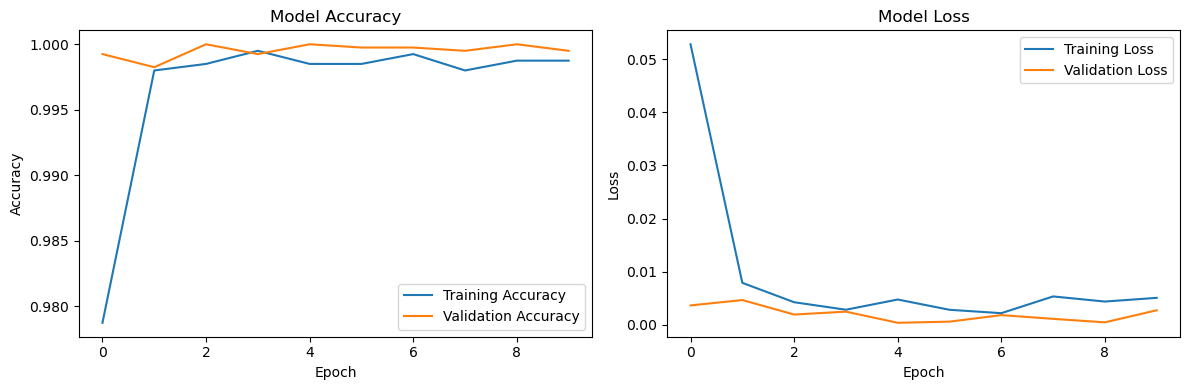

In [16]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

125/125 [==============================] - 131s 1s/step


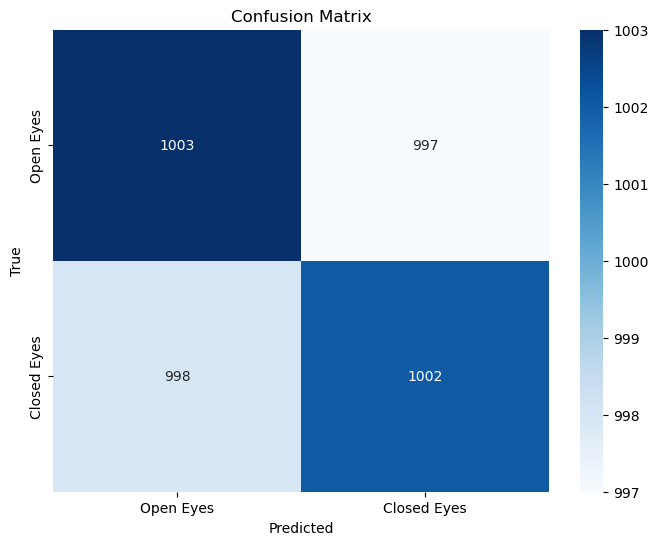

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your model and validation data generator defined

# Generate predictions on your validation data
val_generator.reset()  # Reset the generator to start from the beginning
y_pred = model.predict(val_generator, verbose=1)

# Convert predicted probabilities to class labels (0 or 1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = val_generator.classes

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Define class labels
class_names = ['Open Eyes', 'Closed Eyes']

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming you have your model and validation data generator defined

# Generate predictions on your validation data
val_generator.reset()  # Reset the generator to start from the beginning
y_pred = model.predict(val_generator, verbose=1)

# Convert predicted probabilities to class labels (0 or 1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = val_generator.classes

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred_classes)

# Calculate classification report
class_report = classification_report(y_true, y_pred_classes, target_names=["Open Eyes", "Closed Eyes"])

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)

# Display results
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy:", accuracy)


125/125 [==============================] - 132s 1s/step
Confusion Matrix:
[[1003  997]
 [ 999 1001]]

Classification Report:
              precision    recall  f1-score   support

   Open Eyes       0.50      0.50      0.50      2000
 Closed Eyes       0.50      0.50      0.50      2000

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.50      0.50      0.50      4000


Accuracy: 0.501


# Experiment 2 ResNet

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
# Define your data augmentation and preprocessing
datagen_train = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [14]:

datagen_val = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for validation

# Load and preprocess training data
train_generator = datagen_train.flow_from_directory(
    "C:/Users/Mukesh/Desktop/jupyter lab/Batch 40/Dwasinees/Detecting drawss/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 4000 images belonging to 2 classes.


In [15]:

# Load and preprocess validation data
val_generator = datagen_val.flow_from_directory(
    "C:/Users/Mukesh/Desktop/jupyter lab/Batch 40/Dwasinees/Detecting drawss/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 4000 images belonging to 2 classes.


In [16]:

# Create a ResNet50V2 model with a custom head
def create_resnet_model(input_shape, num_classes):
    base_model = keras.applications.ResNet50V2(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )

    for layer in base_model.layers:
        layer.trainable = False

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.models.Model(inputs=base_model.input, outputs=outputs)
    return model

In [17]:
# Create and compile the ResNet model
model = create_resnet_model((224, 224, 3), 2)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [18]:
# Define a model checkpoint to save the best model during training
checkpoint = ModelCheckpoint(
    "best_model.h5",
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="max"
)

Epoch 1/10
125/125 [==============================] - ETA: 0s - loss: 0.0337 - accuracy: 0.9885
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to best_model.h5


C:\Users\Mukesh\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


125/125 [==============================] - 274s 2s/step - loss: 0.0337 - accuracy: 0.9885 - val_loss: 4.2312e-04 - val_accuracy: 1.0000
Epoch 2/10
125/125 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9987
Epoch 2: val_accuracy did not improve from 1.00000
125/125 [==============================] - 259s 2s/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 4.3734e-04 - val_accuracy: 1.0000
Epoch 3/10
125/125 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9983
Epoch 3: val_accuracy did not improve from 1.00000
125/125 [==============================] - 250s 2s/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 2.5422e-04 - val_accuracy: 1.0000
Epoch 4/10
125/125 [==============================] - ETA: 0s - loss: 0.0061 - accuracy: 0.9980
Epoch 4: val_accuracy did not improve from 1.00000
125/125 [==============================] - 246s 2s/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 5.3080e-05 - val_accuracy: 1.0000
Epoch 5/10
125/

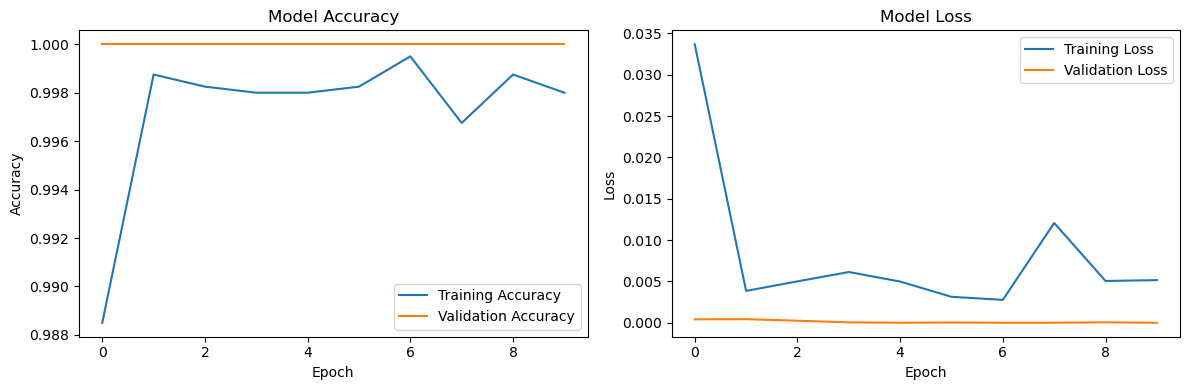

In [19]:








# Train the model with both training and validation data generators
history = model.fit(
    train_generator,
    epochs=10,
    callbacks=[checkpoint],
    validation_data=val_generator  # Use the validation data generator
)

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Load the saved best model
best_model = keras.models.load_model("best_model.h5")

# Generate predictions on the validation data
val_generator.reset()  # Reset the generator to start from the beginning
y_pred = best_model.predict(val_generator, verbose=1)

# Convert predicted probabilities to class labels (0 or 1)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = val_generator.classes

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred_classes)

# Calculate classification report
class_report = classification_report(y_true, y_pred_classes, target_names=["Open Eyes", "Closed Eyes"])

# Display results
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(class_report)

125/125 [==============================] - 128s 1s/step
Confusion Matrix:
[[ 996 1004]
 [1004  996]]

Classification Report:
              precision    recall  f1-score   support

   Open Eyes       0.50      0.50      0.50      2000
 Closed Eyes       0.50      0.50      0.50      2000

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.50      0.50      0.50      4000



In [23]:
print('Acuraccy', accuracy)

Acuraccy 0.5245


In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions back to labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate confusion matrix
confusion = confusion_matrix(y_test_labels, y_pred_labels)

# Calculate classification report
class_report = classification_report(y_test_labels, y_pred_labels, target_names=["Open Eyes", "Closed Eyes"])

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)

# Display results
print("Confusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy:", accuracy)

NameError: name 'X_test' is not defined

In [ ]:
import pickle 

import pickle
from tensorflow import keras

# Assuming you have a trained model stored in the 'model' variable
# Save the model to a file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Load the model from the file
with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Now, 'loaded_model' contains the model loaded from the file
